In [1]:
#!pip install sounddevice

     ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
     ------------------------------- ------ 163.8/199.7 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 199.7/199.7 kB 4.0 MB/s eta 0:00:00


In [87]:
import sounddevice as sd
import numpy as np
from scipy.io import wavfile
from scipy import signal

##this records, and if we gotta make some test data we do it here. 
sample_rate=24000
duration = 5  # seconds
myrecording = sd.rec(duration * sample_rate, samplerate=sample_rate, channels=1,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")



Recording Audio
Audio recording complete , Play Audio


In [3]:
##bleep for the loop
b_sample, b_data = wavfile.read('long_beep.wav')
sd.play(b_data, b_sample)

In [4]:
myrecording.shape

(120000, 1)

In [88]:
sd.play(myrecording, sample_rate)
sd.wait()

In [6]:
frequencies, times, spectrogram = signal.spectrogram(myrecording.squeeze(), sample_rate)

In [86]:
spectrogram.shape

(129, 632)

In [91]:
this_data.shape
frequencies, times, spectrogram = signal.spectrogram(this_data, sample_rate)

C:\Users\konic\AppData\Local\Temp\ipykernel_1792\2981952974.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.


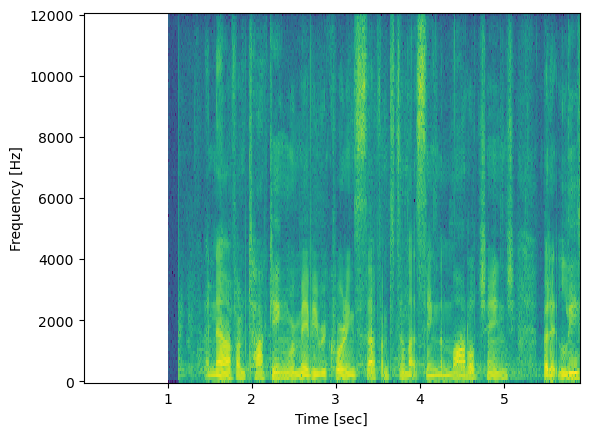

In [92]:
import matplotlib.pyplot as plt


plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [8]:
spectrogram.shape

(129, 535)

In [11]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B683-C944

 Directory of C:\Users\konic\Documents\CS 523\DL_STFU

04/24/2023  01:22 PM    <DIR>          .
04/24/2023  01:22 PM    <DIR>          ..
04/24/2023  01:22 PM            10,244 .DS_Store
04/24/2023  01:22 PM    <DIR>          .git
04/24/2023  01:22 PM                37 .gitignore
03/26/2023  05:06 PM    <DIR>          .idea
04/24/2023  01:22 PM    <DIR>          .ipynb_checkpoints
04/24/2023  01:22 PM            11,140 API Multithreading.ipynb
03/26/2023  05:42 PM               743 Audio_file_generator.ipynb
04/24/2023  01:22 PM        10,895,238 cuss_word_time_stamp_wisper_true.csv
03/26/2023  05:06 PM            75,506 en-US.wav
03/27/2023  12:29 PM                 2 filename_dict_error_26100.json
04/24/2023  01:22 PM            67,148 kaggle_data_cleaning.ipynb
04/24/2023  01:22 PM        21,137,840 labeled_augmented.csv
04/24/2023  01:22 PM            63,128 long_beep.wav
04/02/2023  04:22 PM             2,289 nk-dls

In [12]:
cd training

C:\Users\konic\Documents\CS 523\DL_STFU\training


In [13]:
from network_tall_skinny import TallSkinny_2

In [14]:
cd ..

C:\Users\konic\Documents\CS 523\DL_STFU


In [15]:
import torch
model = TallSkinny_2()
model.load_state_dict(torch.load('tall_skinny_2.pt', map_location=torch.device('cpu')))
##100 time step 

<All keys matched successfully>

In [73]:
print(model.state_dict())

OrderedDict([('conv1a.weight', tensor([[[[ 1.2400e-01],
          [ 4.5181e-02],
          [ 6.0093e-02],
          [-2.2083e-02],
          [ 5.3318e-02],
          [ 2.5815e-03],
          [-7.1677e-03],
          [ 5.5213e-02],
          [ 1.4197e-02],
          [-4.9116e-02],
          [ 1.7794e-02],
          [-8.3262e-03],
          [ 6.2520e-02],
          [-4.0273e-02],
          [-4.3392e-02],
          [-7.3164e-03],
          [-6.1536e-02],
          [-1.3738e-02],
          [ 8.3677e-02],
          [ 5.5512e-02],
          [ 8.8334e-02],
          [-5.1974e-03],
          [-6.0918e-02],
          [-3.7020e-02],
          [-3.5833e-02],
          [-3.2866e-02],
          [-1.0980e-02],
          [ 3.7969e-02],
          [ 5.9880e-02],
          [ 8.1704e-02],
          [ 9.3105e-02],
          [-3.8331e-02],
          [ 5.3782e-02],
          [ 4.8723e-02],
          [ 5.0604e-02],
          [ 1.5073e-03],
          [ 2.3996e-04],
          [-2.4939e-03],
          [-6.8874e

In [16]:
model = model.to('cpu')

In [17]:
model

TallSkinny_2(
  (conv1a): Conv2d(1, 4, kernel_size=(129, 1), stride=(1, 1))
  (conv1b): Conv2d(1, 4, kernel_size=(129, 3), stride=(1, 1))
  (conv1c): Conv2d(1, 4, kernel_size=(129, 5), stride=(1, 1))
  (conv1d): Conv2d(1, 4, kernel_size=(129, 10), stride=(1, 1))
  (relu1): ReLU()
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(1, 3), stride=(1, 1))
  (relu2): ReLU()
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(1, 3), stride=(1, 1))
  (relu3): ReLU()
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(1, 3), stride=(1, 1))
  (relu4): ReLU()
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [20]:
x = torch.ones((1,1,129,100))
x
model(x)

tensor([[-3.5828]], grad_fn=<AddmmBackward0>)

In [78]:
from torch.nn import Sigmoid
import matplotlib.pyplot as plt

In [89]:
##blocksize works if it is size sample_rate
##out
def stream_microphone(model,duration=5, sample_rate=24000, channels=1,block_duration = 100, output_window = 50, bleep_file = 'short_beep.wav'):
    """
    block duration is number of miliseconds at which it samples and runs inference
    
    output window is a hyper parameter that is the t step for the model.
    
    beep file right now is either 'long_beep.wav' or 'short_beep.wav'
    
    Stream audio from the microphone for a given duration.

    Args:
        duration (float): Duration of the audio stream in seconds (default: 10).
        sample_rate (int): Sampling rate in Hz (default: 44100).
        channels (int): Number of audio channels (default: 1).

    Returns:
        numpy.ndarray: An array of shape (samples, channels) containing the audio data.
        
    """
    b_sample, b_data = wavfile.read(bleep_file)
    
    # Calculate the number of samples based on the duration and sample rate.
    num_samples = int(duration * sample_rate)

    # Create an empty numpy array to store the audio data.
    zero_pad = int(sample_rate * block_duration * output_window / 10000)
    #model_input = np.array([], dtype=np.float32)
    model_input = np.zeros(zero_pad,dtype=np.float32)
    
    sigmoid_layer = Sigmoid()
    
    def callback(indata, frames, time, status):
        nonlocal model_input
        if status:
            print(status)
        model_input = np.append(model_input, indata.copy())  
        _, _, spectrogram = signal.spectrogram(model_input[-zero_pad:].squeeze(), sample_rate)
        inference_input = spectrogram[:,-output_window:]
        #print(inference_input.shape)
        ##make inference here
        ## this if will be the result fo the inference.  
        ##print(len(model_input))
        #if len(model_input) in [40800,45600,64800,69600,74400]:
         #   sd.play(b_data, b_sample)

            
        
        inference_input = torch.from_numpy(inference_input)
        inference_input = torch.unsqueeze(torch.unsqueeze(inference_input, 0), 0)
        
        bleep = sigmoid_layer(model(inference_input))
        print(bleep)
        if bleep > 0.5:
            sd.play(b_data, b_sample)

    with sd.InputStream( channels=1, callback=callback,
                        blocksize=int(sample_rate * block_duration / 1000),
                        samplerate=sample_rate):
        sd.sleep(int(duration * 1000))
        #print("hi")
    return model_input

In [90]:
this_data = stream_microphone(model, output_window=100)

tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.0270]], grad_fn=<SigmoidBackward0>)
tensor([[0.02

In [23]:
this_data.shape

(14400,)

In [24]:
frequencies, times, spectrogram = signal.spectrogram(this_data.squeeze(), sample_rate)

In [25]:
plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
sd.play(this_data, sample_rate)
sd.wait()

In [ ]:
spectrogram.shape